# Flame Temperature

This example demonstrates calculation of the adiabatic flame temperature for a methane/air mixture.

In [1]:
#%matplotlib notebook
#%matplotlib auto
import cantera as ct
import numpy as np
import matplotlib.pyplot as plt

## Chemical reaction considered (complete combustion)

The equation of a lean methane/air mixture ($\phi < 1$ or $z > z_s$) is:

$$\mathrm{C_3H_8 + z (0.21 O_2 + 0.79 N_2) \rightarrow CO_2 +  2 H_2O + 0.21 (z - z_s) O_2 + 0.79  z  N_2}$$

For a rich mixture ($\phi > 1$ or $z < z_s$), this becomes:

$$\mathrm{ C_3H_8 + z (0.21 O_2 + 0.79 N_2) \rightarrow (z/z_s) CO_2 + 2 (z/z_s) H_2O + (1-z/z_s) CH_4 + 0.79  z  N_2}$$

To find the flame temperature resulting from these reactions using Cantera, we create a gas object containing only the species in the above equations, and then use the `equilibrate()` function to find the resulting mixture composition and temperature, taking advantage of the fact that equilibrium will strongly favor conversion of the fuel molecule.

In [2]:
# Get all of the Species objects defined in the GRI 3.0 mechanism
species = {S.name: S for S in ct.Species.listFromFile('gri30.cti')}

# Create an IdealGas object with species rconsidered
complete_species = [species[S] for S in ('C3H8','O2','N2','CO2','H2O')]
gas1 = ct.Solution(thermo='IdealGas', species=complete_species)

z = np.linspace(5, 40, 100)
T_complete = np.zeros(z.shape)
for i in range(len(z)):
    X = {'C3H8':1.0, 'O2': 0.21*z[i], 'N2': 0.79*z[i]}
    gas1.TPX = 300, ct.one_atm, X
    gas1.equilibrate('HP')
    T_complete[i] = gas1.T

In [3]:
# Get all of the Species objects defined in the GRI 3.0 mechanism
species = {S.name: S for S in ct.Species.listFromFile('gri30.cti')}

# Create an IdealGas object with species rconsidered
complete_species = [species[S] for S in ('C3H8','O2','N2','CO2','H2O','CO','H2')]
gas1 = ct.Solution(thermo='IdealGas', species=complete_species)

z = np.linspace(5, 40, 100)
T_complete = np.zeros(z.shape)
XCO2 = np.zeros(z.shape)
XCO = np.zeros(z.shape)
for i in range(len(z)):
    X = {'C3H8':1.0, 'O2': 0.21*z[i], 'N2': 0.79*z[i]}
    gas1.TPX = 300, ct.one_atm, X
    gas1.equilibrate('HP')
    T_complete[i] = gas1.T
    XCO2[i] = gas1['CO2'].X
    XCO[i] = gas1['CO'].X

In [4]:
gas2 = ct.Solution('gri30.cti')
phi = np.linspace(0.5, 2.0, 100)
TCH4 = np.zeros(phi.shape)
for i in range(len(phi)):
    gas2.TP = 300, ct.one_atm
    gas2.set_equivalence_ratio(phi[i], 'CH4', 'O2:1, N2:3.76')
    gas2.equilibrate('HP')
    TCH4[i] = gas2.T
    
TH2 = np.zeros(phi.shape)
for i in range(len(phi)):
    gas2.TP = 300, ct.one_atm
    gas2.set_equivalence_ratio(phi[i], 'H2', 'O2:1, N2:3.76')
    gas2.equilibrate('HP')
    TH2[i] = gas2.T
    
TC2H6 = np.zeros(phi.shape)
for i in range(len(phi)):
    gas2.TP = 300, ct.one_atm
    gas2.set_equivalence_ratio(phi[i], 'C2H6', 'O2:1, N2:3.76')
    gas2.equilibrate('HP')
    TC2H6[i] = gas2.T

TC2H4 = np.zeros(phi.shape)
for i in range(len(phi)):
    gas2.TP = 300, ct.one_atm
    gas2.set_equivalence_ratio(phi[i], 'C2H4', 'O2:1, N2:3.76')
    gas2.equilibrate('HP')
    TC2H4[i] = gas2.T

    
gas2 = ct.Solution('C3H8.cti')
TC3H8 = np.zeros(phi.shape)
for i in range(len(phi)):
    gas2.TP = 300, ct.one_atm
    gas2.set_equivalence_ratio(phi[i], 'C3H8', 'O2:1, N2:3.76')
    gas2.equilibrate('HP')
    TC3H8[i] = gas2.T
    
gas2 = ct.Solution('Nheptane.cti')
TC4H10 = np.zeros(phi.shape)
for i in range(len(phi)):
    gas2.TP = 300, ct.one_atm
    gas2.set_equivalence_ratio(phi[i], 'C4H10', 'O2:1, N2:3.76')
    gas2.equilibrate('HP')
    TC4H10[i] = gas2.T

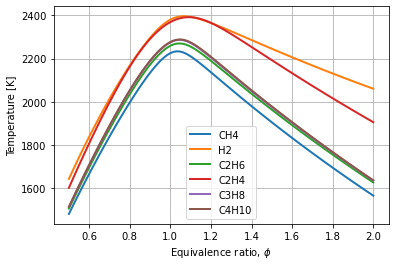

In [5]:
plt.plot(phi, TCH4, label='CH4', lw=2)
plt.plot(phi, TH2, label='H2', lw=2)
plt.plot(phi, TC2H6, label='C2H6', lw=2)
plt.plot(phi, TC2H4, label='C2H4', lw=2)
plt.plot(phi, TC3H8, label='C3H8', lw=2)
plt.plot(phi, TC4H10, label='C4H10', lw=2)
plt.grid(True)
plt.legend()
plt.xlabel('Equivalence ratio, $\phi$')
plt.ylabel('Temperature [K]');
plt.show()

In [19]:
gas2 = ct.Solution('gri30.cti')
phi = np.linspace(0.5, 2.0, 100)
TCH4 = np.zeros(phi.shape)
for i in range(len(phi)):
    gas2.TP = 300, ct.one_atm
    gas2.set_equivalence_ratio(phi[i], 'CH4', 'O2:1')
    gas2.equilibrate('HP')
    TCH4[i] = gas2.T
    
TH2 = np.zeros(phi.shape)
for i in range(len(phi)):
    gas2.TP = 300, ct.one_atm
    gas2.set_equivalence_ratio(phi[i], 'H2', 'O2:1')
    gas2.equilibrate('HP')
    TH2[i] = gas2.T
    
TC2H6 = np.zeros(phi.shape)
for i in range(len(phi)):
    gas2.TP = 300, ct.one_atm
    gas2.set_equivalence_ratio(phi[i], 'C2H6', 'O2:1')
    gas2.equilibrate('HP')
    TC2H6[i] = gas2.T

TC2H4 = np.zeros(phi.shape)
for i in range(len(phi)):
    gas2.TP = 300, ct.one_atm
    gas2.set_equivalence_ratio(phi[i], 'C2H4', 'O2:1')
    gas2.equilibrate('HP')
    TC2H4[i] = gas2.T

TC3H8 = np.zeros(phi.shape)
for i in range(len(phi)):
    gas2.TP = 300, ct.one_atm
    gas2.set_equivalence_ratio(phi[i], 'C3H8', 'O2:1')
    gas2.equilibrate('HP')
    TC3H8[i] = gas2.T
    
gas2 = ct.Solution('Nheptane.cti')
TC4H10 = np.zeros(phi.shape)
for i in range(len(phi)):
    gas2.TP = 300, ct.one_atm
    gas2.set_equivalence_ratio(phi[i], 'C4H10', 'O2:1')
    gas2.equilibrate('HP')
    TC4H10[i] = gas2.T

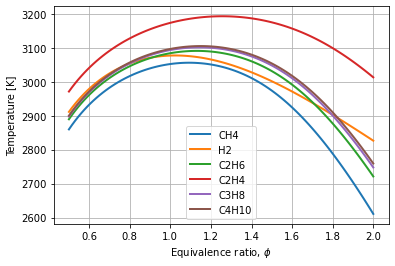

In [20]:
plt.plot(phi, TCH4, label='CH4', lw=2)
plt.plot(phi, TH2, label='H2', lw=2)
plt.plot(phi, TC2H6, label='C2H6', lw=2)
plt.plot(phi, TC2H4, label='C2H4', lw=2)
plt.plot(phi, TC3H8, label='C3H8', lw=2)
plt.plot(phi, TC4H10, label='C4H10', lw=2)
plt.grid(True)
plt.legend()
plt.xlabel('Equivalence ratio, $\phi$')
plt.ylabel('Temperature [K]');
plt.show()